In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.stats as stats
import matplotlib
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

blues = ["#0d88e6", "#8ECDDD", "#22668D", "#42d4f4", ]
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c',
             '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
             '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'

In [2]:

plt.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
n_features = 6
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"retina_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/retina_xor_multi_arch/{res_folder}"

In [4]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-10-24-10-00-54_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"

In [5]:
lgbm_folder_name = 'exp_2023-11-27-15-51-15_nice_features'
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [6]:
for file_name in os.listdir(lgb_res_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    if '2023-12-24' in file_name:
        feature_selection_res = pd.read_csv(f"{lgb_res_path}/{file_name}")
feature_selection_res = feature_selection_res.sort_values('num_features')


In [7]:
corr_path = f"{results_path}/{res_folder}/feature_correlation/{n_features}_features/"
corr_baseline_res = pd.DataFrame()
for file_name in os.listdir(corr_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    corr_baseline_res = pd.read_csv(f"{corr_path}/{file_name}")
corr_baseline_res = corr_baseline_res[corr_baseline_res['mape'] <= 0.05]

In [8]:
baseline_path = f"{results_path}/{res_folder}/random_feature_selection/{n_features}_features/"
for file_name in os.listdir(baseline_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    res_baseline = pd.read_csv(f"{baseline_path}/{file_name}")
res_baseline = res_baseline[res_baseline['mape'] <= 0.3]


In [9]:
globality_path = f"{results_path}/{res_folder}/feature_globality/{n_features}_features/"
for file_name in os.listdir(globality_path):
    if '_all_exp_mape_prediction_results.csv' not in file_name:
        continue
    globality_baseline_res = pd.read_csv(f"{globality_path}/{file_name}")
globality_baseline_res = globality_baseline_res[globality_baseline_res['mape'] <= 0.2]

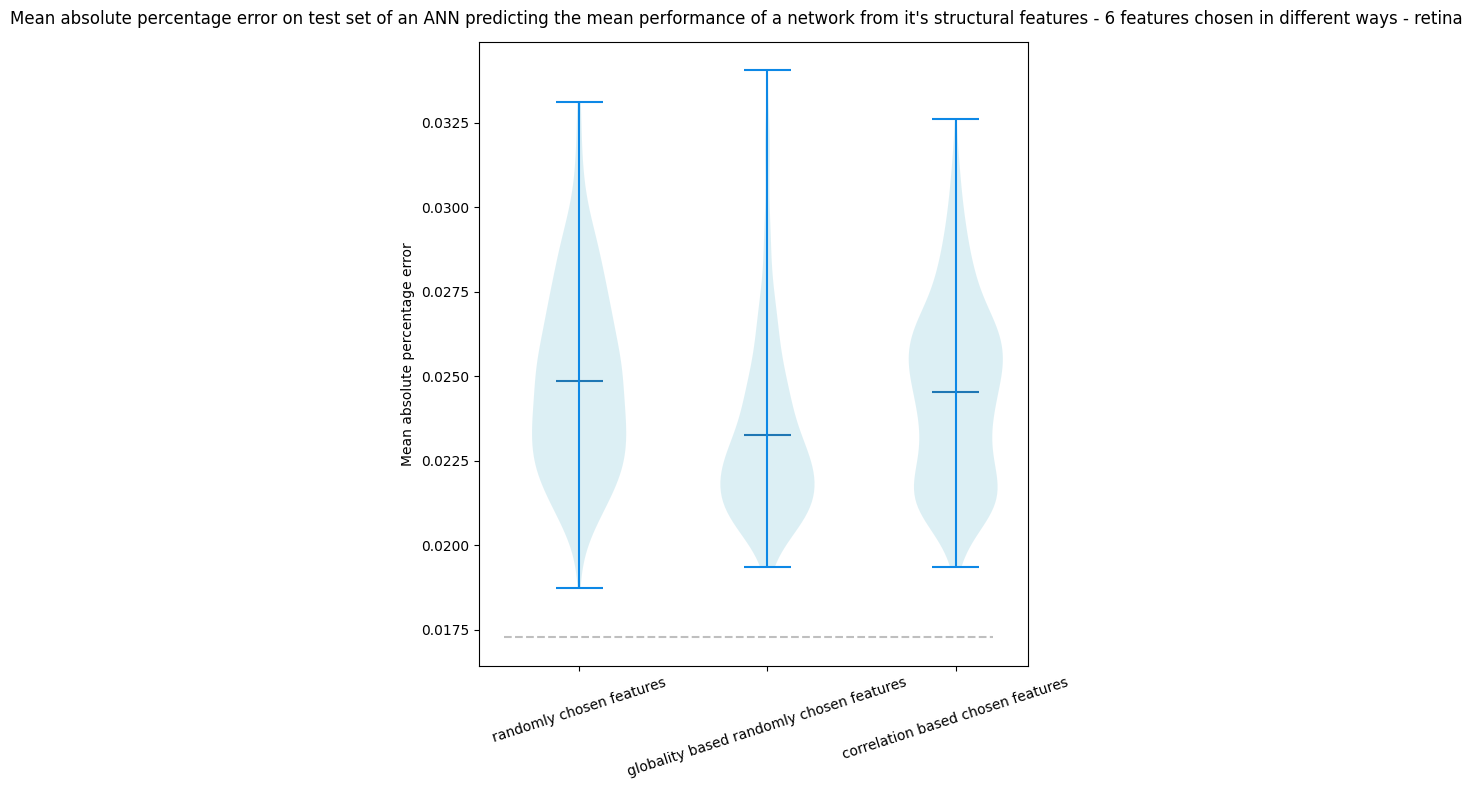

In [39]:
feature_sellection_val = feature_selection_res['test mape ind'][
    feature_selection_res['num_features'] == n_features].item()

all_data = [
    res_baseline['mape'],
    globality_baseline_res['mape'],
    corr_baseline_res['mape'],
]
labels = [
    'randomly chosen features',
    'globality based randomly chosen features',
    'correlation based chosen features'
]
plt.figure(figsize=(7, 8), )

plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(blues[1])
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = parts[partname]
    vp.set_edgecolor(blues[0])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

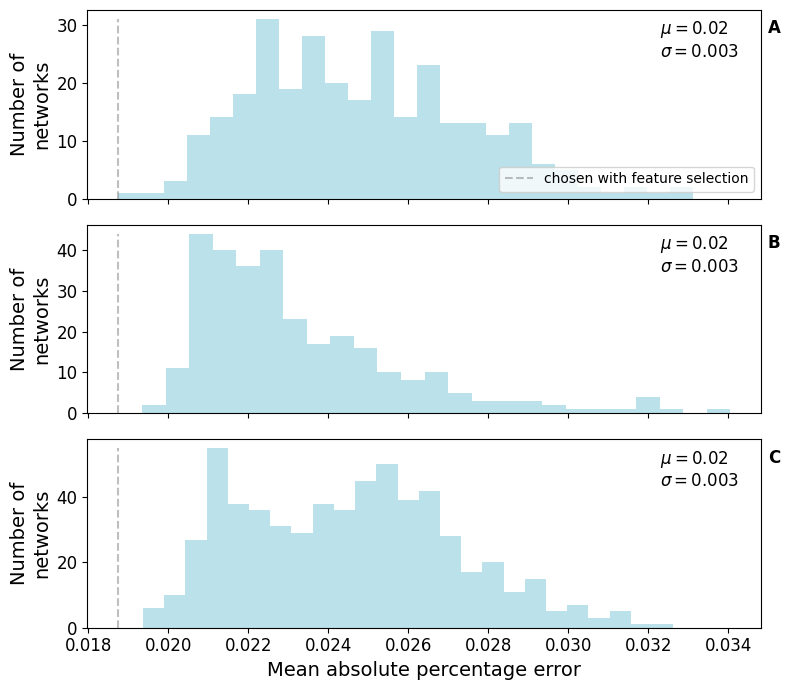

In [14]:
feature_sellection_val = feature_selection_res['test_mape'][
    feature_selection_res['num_features'] == n_features].item()

all_data = [
    res_baseline['mape'],
    globality_baseline_res['mape'],
    corr_baseline_res['mape'],
]
labels = [
    'randomly chosen features',
    'globality based randomly chosen features',
    'correlation based chosen features'
]
nums=['A', 'B', 'C']
plt.figure()
fig, axs = plt.subplots(3, 1, figsize=(8, 7), sharex='all')
for i, (baseline, lab) in enumerate(zip(all_data, labels)):
    mu, std = stats.norm.fit(baseline)
    n, _, _ = axs[i].hist(baseline, bins=25, alpha=0.6, color=blues[1])
    #axs[i].set_title(f"{lab}", fontsize=13)
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu),
        r'$\sigma=%.3f$' % (std)))
    axs[i].text(0.85, 0.95, textstr, transform=axs[i].transAxes, fontsize=12, verticalalignment='top', )
    axs[i].text(1.01, 0.95, nums[i], transform=axs[i].transAxes, fontsize=12, verticalalignment='top',  weight="bold")
    axs[i].vlines(x=feature_sellection_val, ymin=0,
                  ymax=max(n), colors='grey', linestyles='--', alpha=0.5,
                  label='chosen with feature selection')
    axs[i].set_ylabel('Number of\nnetworks', fontsize=14)
    axs[i].tick_params(axis='both',  labelsize=12)
axs[2].set_xlabel('Mean absolute percentage error', fontsize=14)
axs[0].legend(loc='lower right', )
#plt.suptitle(f'Digit recognition - performance of alternative feature selection methods', fontsize=13)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_swapping.png")
plt.show()

In [41]:
feature_sellection_val

0.0173112457661931

In [42]:
for a in all_data:
    print(round(a.mean(),4), round(a.min(), 4))

0.0248 0.0187
0.0232 0.0193
0.0245 0.0194


In [11]:
all_f_names = pd.read_csv(f"{results_path}/{res_folder}/all_feature_names.csv")['0'].tolist()

In [12]:
globality_level = {
    1: [
        'connectivity_ratio',
        'num_connections',
        'max_possible_connections',
        'motifs_count',
        'dimensions',
        'num_layers',
        'num_neurons'
    ],
    0.75: [
        'total_connectivity_ratio_between_layers',
        'max_connectivity_between_layers_per_layer',
        'layer_connectivity_rank',
    ],
    0.5: [
        'distances_between_input_neuron',
        'num_paths_to_output_per_input_neuron',
        'num_involved_neurons_in_paths_per_input_neuron',
    ],
    0: [
        'out_connections_per_layer',
        'in_connections_per_layer',
    ]
}
def get_glob_level(feature_full_name):
    for globality_idx, features_list in globality_level.items():
        for f in features_list:
            if f == 'connectivity_ratio' and f != feature_full_name:
                continue
            if f in feature_full_name:
                return globality_idx


In [13]:
single_feature_path = f"{results_path}/{res_folder}/single_feature_prediction/"
single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{single_feature_path}/{file_name}")
    feature_ind =  int(file_name.split('feature_')[1].split('_best.csv')[0]) -1
    temp['feature_ind'] = feature_ind
    feature_name = all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    temp['feature_globality_level'] =  get_glob_level(feature_name)
    single_feature_baseline_res = pd.concat([single_feature_baseline_res, temp], ignore_index=True)

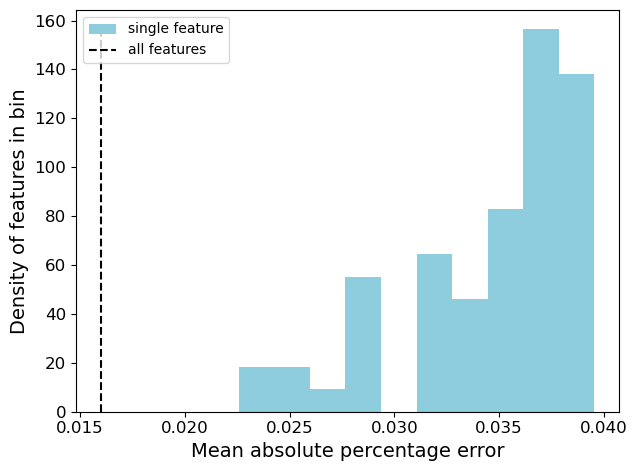

In [15]:
n, _, _ = plt.hist(single_feature_baseline_res['best mape test'][single_feature_baseline_res['best mape test'] < 0.7],
                   color=blues[1],  density=True, label='single feature')
feature_sellection_max_val = 0.016
plt.vlines(x=feature_sellection_max_val, ymin=0,
           ymax=max(n), colors='black', linestyles='--',
           label='all features')
plt.xlabel('Mean absolute percentage error', fontsize=14)
plt.ylabel('Density of features in bin', fontsize=14)
#plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features.png")
plt.show()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_96865/4172616412.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level][single_feature_baseline_res['best mape test'] < 0.7]['best mape test']


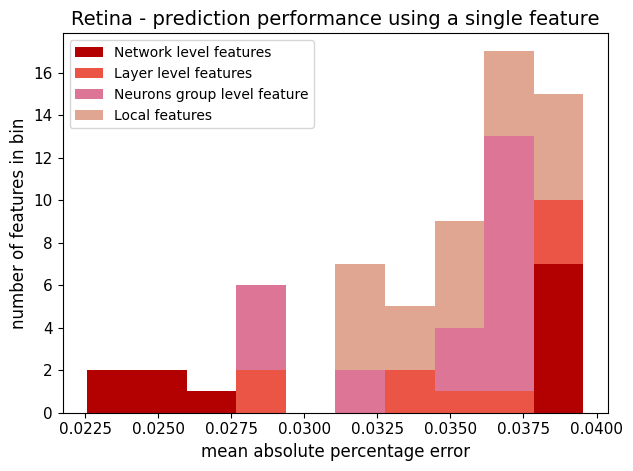

In [47]:
g_single_feature_baseline_res = [
    single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level][single_feature_baseline_res['best mape test'] < 0.7]['best mape test']
    for g_level in globality_level.keys()
]
glob_levels_names = {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons group level feature",
    0: "Local features"
}
rads_blues =  ["#b30000", "#ea5545", COLORS[2], "#e1a692",  ]
n, p, b = plt.hist(g_single_feature_baseline_res, stacked=True,
                   color=rads_blues,  label=list(glob_levels_names.values())
                    )
plt.xlabel('mean absolute percentage error', fontsize=12)
plt.ylabel('number of features in bin', fontsize=12)
plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.legend()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features_by_glob.png")
plt.show()

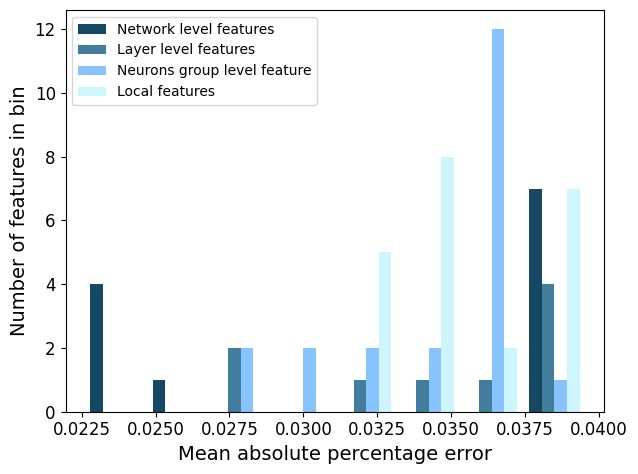

In [56]:
g_single_feature_baseline_res = [
    single_feature_baseline_res[single_feature_baseline_res['feature_globality_level'] == g_level]['best mape test'][single_feature_baseline_res['best mape test'] <0.4]
    for g_level in globality_level.keys()
]
glob_levels_names = {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons group level feature",
    0: "Local features"
}
sorted_blues = [
"#164863",
    "#427D9D",
    "#87C4FF",
    "#CDF5FD",
]

#"#D0E7D2",]
n, p, b = plt.hist(g_single_feature_baseline_res,  bins=8,

                   color=sorted_blues,  label=list(glob_levels_names.values())
                    )
plt.xlabel('Mean absolute percentage error', fontsize=14)
plt.ylabel('Number of features in bin', fontsize=14)
#plt.title(f"{task.capitalize()} - prediction performance using a single feature", fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper left')
plt.savefig(
    f"{plot_path}/{time_str}_{task}_single_features_by_glob.png")
plt.show()